In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import joblib


In [2]:
df = pd.read_csv("LPU_shop_earnings_updated.csv")
df.shape


(1000, 15)

In [3]:
df.head()


,Shop_ID,Shop_Type,Shop_Location,Shop_Size_sqft,Years_in_Operation,Average_Daily_Customers,Average_Spending_per_Customer,Competition_Count,Rent_Cost_per_Month,Monthly_Inventory_Cost,Other_Expenses,Festival_Season,Exam_Season,Month,Monthly_Earnings
0,1,Cafe,BH-1 Complex,154,8,111,88,5,11191,26964,7092,0,1,Jun,243040
1,2,Clothing,BH-7 Complex,240,6,112,61,5,12949,17433,9311,0,0,Nov,148128
2,3,Stationery,BH-5 Complex,134,4,101,87,1,6189,34118,7005,0,1,May,213610
3,4,Mobile Shop,Law Gate,88,5,132,98,2,16627,23792,6363,0,0,Jul,325144
4,5,Clothing,Law Gate,183,4,103,67,2,14226,29541,7152,0,0,Apr,157030


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Shop_ID                        1000 non-null   int64 
 1   Shop_Type                      1000 non-null   object
 2   Shop_Location                  1000 non-null   object
 3   Shop_Size_sqft                 1000 non-null   int64 
 4   Years_in_Operation             1000 non-null   int64 
 5   Average_Daily_Customers        1000 non-null   int64 
 6   Average_Spending_per_Customer  1000 non-null   int64 
 7   Competition_Count              1000 non-null   int64 
 8   Rent_Cost_per_Month            1000 non-null   int64 
 9   Monthly_Inventory_Cost         1000 non-null   int64 
 10  Other_Expenses                 1000 non-null   int64 
 11  Festival_Season                1000 non-null   int64 
 12  Exam_Season                    1000 non-null   int64 
 13  Mont

In [5]:
df.describe()


,Shop_ID,Shop_Size_sqft,Years_in_Operation,Average_Daily_Customers,Average_Spending_per_Customer,Competition_Count,Rent_Cost_per_Month,Monthly_Inventory_Cost,Other_Expenses,Festival_Season,Exam_Season,Monthly_Earnings
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,165.250000,5.03100,104.15200,88.820000,2.950000,11976.93900,26974.600000,7972.799000,0.29200,0.411000,217780.320000
std,288.819436,49.217638,2.57462,26.08339,17.491643,1.416865,3491.14929,7328.619474,2300.536867,0.45491,0.492261,86112.483348
min,1.000000,80.000000,1.00000,60.00000,60.000000,1.000000,6009.00000,15011.000000,4002.000000,0.00000,0.000000,54188.000000
25%,250.750000,119.000000,3.00000,82.00000,74.000000,2.000000,9018.00000,20494.250000,6144.750000,0.00000,0.000000,151115.000000
50%,500.500000,167.000000,5.00000,105.00000,88.000000,3.000000,11990.50000,26658.000000,7849.500000,0.00000,0.000000,206200.000000
75%,750.250000,208.000000,7.00000,126.00000,104.000000,4.000000,15079.25000,33384.500000,9963.000000,1.00000,1.000000,271072.500000
max,1000.000000,249.000000,9.00000,149.00000,119.000000,5.000000,17956.00000,39974.000000,11990.000000,1.00000,1.000000,463300.000000


In [6]:
df.isnull().sum()


Shop_ID                          0
Shop_Type                        0
Shop_Location                    0
Shop_Size_sqft                   0
Years_in_Operation               0
Average_Daily_Customers          0
Average_Spending_per_Customer    0
Competition_Count                0
Rent_Cost_per_Month              0
Monthly_Inventory_Cost           0
Other_Expenses                   0
Festival_Season                  0
Exam_Season                      0
Month                            0
Monthly_Earnings                 0
dtype: int64

In [7]:
df["Shop_Location"].value_counts()


Shop_Location
BH-1 Complex    208
BH-5 Complex    208
BH-7 Complex    207
UniMall         194
Law Gate        183
Name: count, dtype: int64

In [8]:
df["Monthly_Expenses"] = (
    df["Rent_Cost_per_Month"]
    + df["Monthly_Inventory_Cost"]
    + df["Other_Expenses"]
)

df["Monthly_Profit"] = df["Monthly_Earnings"] - df["Monthly_Expenses"]


In [9]:
df.groupby("Shop_Type")["Monthly_Profit"].mean()


Shop_Type
Cafe           184964.081081
Clothing       174316.298137
Food Stall     157788.832432
Mobile Shop    178375.153409
Salon          171061.857923
Stationery     160048.251701
Name: Monthly_Profit, dtype: float64

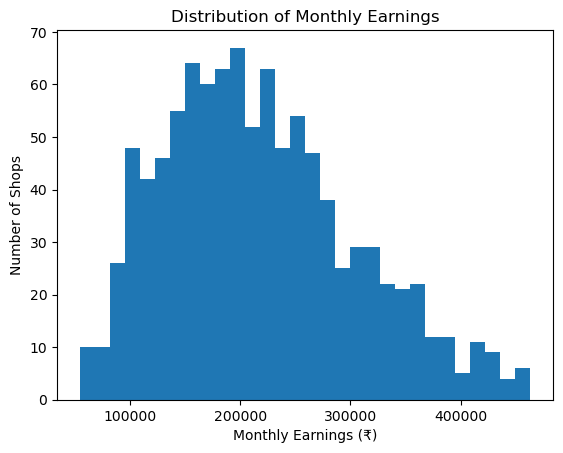

In [10]:
plt.figure()
plt.hist(df["Monthly_Earnings"], bins=30)
plt.xlabel("Monthly Earnings (₹)")
plt.ylabel("Number of Shops")
plt.title("Distribution of Monthly Earnings")
plt.show()


In [11]:
(df.groupby("Shop_Location")["Monthly_Earnings"].mean() / 100000)


Shop_Location
BH-1 Complex    2.215282
BH-5 Complex    2.163530
BH-7 Complex    2.137227
Law Gate        2.197707
UniMall         2.177442
Name: Monthly_Earnings, dtype: float64

In [12]:
df.groupby("Shop_Location")["Average_Daily_Customers"].mean()


Shop_Location
BH-1 Complex    104.326923
BH-5 Complex    103.317308
BH-7 Complex    103.830918
Law Gate        104.087432
UniMall         105.262887
Name: Average_Daily_Customers, dtype: float64

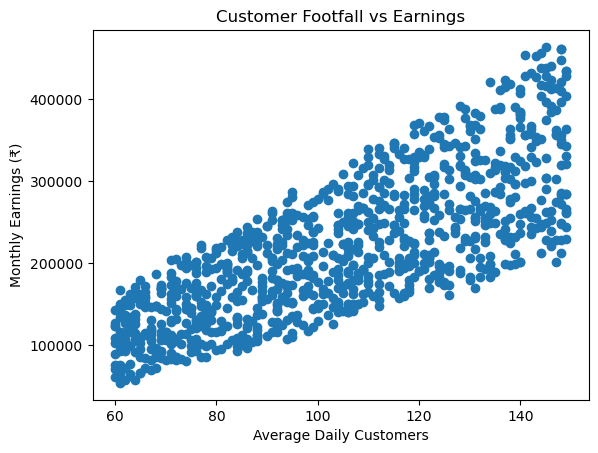

In [13]:
plt.figure()
plt.scatter(
    df["Average_Daily_Customers"],
    df["Monthly_Earnings"]
)
plt.xlabel("Average Daily Customers")
plt.ylabel("Monthly Earnings (₹)")
plt.title("Customer Footfall vs Earnings")
plt.show()


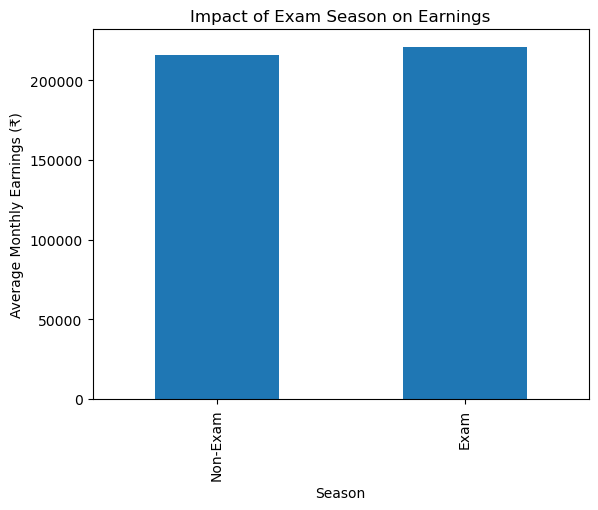

In [14]:
df.groupby("Exam_Season")["Monthly_Earnings"].mean().plot(kind="bar")
plt.xticks([0,1], ["Non-Exam", "Exam"])
plt.xlabel("Season")
plt.ylabel("Average Monthly Earnings (₹)")
plt.title("Impact of Exam Season on Earnings")
plt.show()


In [15]:
df.corr(numeric_only=True)["Monthly_Earnings"].sort_values(ascending=False)


Monthly_Earnings                 1.000000
Monthly_Profit                   0.995349
Average_Daily_Customers          0.771530
Average_Spending_per_Customer    0.590172
Shop_Size_sqft                   0.045409
Shop_ID                          0.039957
Years_in_Operation               0.039101
Exam_Season                      0.029616
Competition_Count                0.016504
Other_Expenses                   0.013003
Festival_Season                 -0.033036
Monthly_Inventory_Cost          -0.047218
Rent_Cost_per_Month             -0.050650
Monthly_Expenses                -0.058710
Name: Monthly_Earnings, dtype: float64

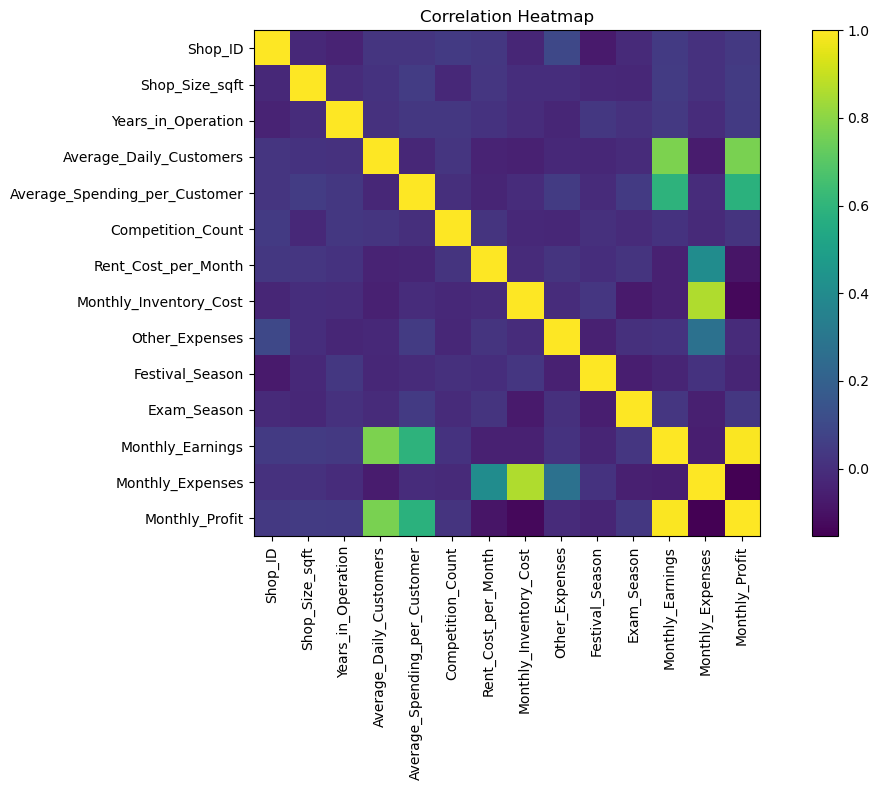

In [16]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [17]:
drop_cols = [
    "Shop_ID",
    "Monthly_Earnings",
    "Monthly_Expenses",
    "Monthly_Profit"
]

X = df.drop(columns=drop_cols, errors="ignore")
y = df["Monthly_Earnings"]

X.columns


Index(['Shop_Type', 'Shop_Location', 'Shop_Size_sqft', 'Years_in_Operation',
       'Average_Daily_Customers', 'Average_Spending_per_Customer',
       'Competition_Count', 'Rent_Cost_per_Month', 'Monthly_Inventory_Cost',
       'Other_Expenses', 'Festival_Season', 'Exam_Season', 'Month'],
      dtype='object')

In [18]:
categorical_cols = ["Shop_Type", "Shop_Location", "Month"]
numerical_cols = [c for c in X.columns if c not in categorical_cols]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numerical_cols)
])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42
    )
}

results = []

for name, reg in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", reg)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    results.append([name, mae, r2])

results_df = pd.DataFrame(
    results, columns=["Model", "MAE", "R2_Score"]
)

results_df


,Model,MAE,R2_Score
0,Linear Regression,10404.288772,0.972644
1,Decision Tree,11273.840000,0.969167
2,Random Forest,7836.613625,0.984932


In [21]:
final_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

final_model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Shop_Type', 'Shop_Location',
                                                   'Month']),
                                                 ('num', 'passthrough',
                                                  ['Shop_Size_sqft',
                                                   'Years_in_Operation',
                                                   'Average_Daily_Customers',
                                                   'Average_Spending_per_Customer',
                                                   'Competition_Count',
                                                   'Rent_Cost_per_Month',
                                                   'Monthly_Inventory_Cost',
                                                   'Other_Expenses',
                                                   'Festival_Season',
                                                   'Exam_Season'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [22]:
y_pred = final_model.predict(X_test)

print("Final Model R2 Score:", r2_score(y_test, y_pred))
print("Final Model MAE:", mean_absolute_error(y_test, y_pred))


Final Model R2 Score: 0.997960845131706
Final Model MAE: 2803.1857500000015


In [23]:
joblib.dump(final_model, "lpu_shop_model.pkl")


['lpu_shop_model.pkl']

In [25]:
import os 
cwd = os.getcwd()
print(cwd)

C:\Users\sharm\INT 234 CA2
